In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import seaborn as sns
import plotly.graph_objs as go

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/Users/sanjayakunwar/Desktop/Uncleaned_DS_jobs.csv')

In [4]:
df.head(3)

index          Job Title               Salary Estimate  \
0      0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1      1     Data Scientist  $137K-$171K (Glassdoor est.)   
2      2     Data Scientist  $137K-$171K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   

          Company Name       Location  Headquarters                     Size  \
0     Healthfirst\n3.1   New York, NY  New York, NY   1001 to 5000 employees   
1         ManTech\n4.2  Chantilly, VA   Herndon, VA  5001 to 10000 employees   
2  Analysis Group\n3.8     Boston, MA    Boston, MA   1001 to 5000 employees   

   Founded        Type of ownership                Industry  \
0     1993   Nonprofit Organization      Insurance Carriers   
1     1968         Company - Public  Research & Development   
2     1981  Private Practice / Firm              Consulting   

              Sector                     Revenue  \
0          Insurance    Unknown / Non-Applicable   
1  Business Services      $1 to $2 billion (USD)   
2  Business Services  $100 to $500 million (USD)   

                               Competitors  
0  EmblemHealth, UnitedHealth Group, Aetna  
1                                       -1  
2                                       -1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [6]:
df.shape

(672, 15)

In [7]:
df.isnull().sum()

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [8]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [9]:
df.drop(columns=['index'], axis=1, inplace=True)

In [10]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

### Job Title

In [11]:
df['Job Title'].nunique()

172

###

### 'Salary max' and 'Salary min' columns 

In [12]:
df['Salary min'] = df['Salary Estimate'].apply(lambda x: re.search(r'\$(\d+K)', x).group(1))
df['Salary max'] = df['Salary Estimate'].apply(lambda x: re.search(r'\$(\d+)K\-\$(\d+K)', x).group(2))

###

### Job Description

In [13]:
df['Job Description'].sample(2)

341    Hi,\n\nGreetings of the Day!!!\n\nLooking for ...
337    Thank you for your interest in joining the Cen...
Name: Job Description, dtype: object

###

### Rating

In [14]:
df['Rating'].unique()

array([ 3.1,  4.2,  3.8,  3.5,  2.9,  3.9,  4.4,  3.6,  4.5,  4.7,  3.7,
        3.4,  4.1,  3.2,  4.3,  2.8,  5. ,  4.8,  3.3,  2.7,  2.2,  2.6,
        4. ,  2.5,  4.9,  2.4, -1. ,  2.3,  4.6,  3. ,  2.1,  2. ])

###

### Company Name

In [15]:
df['Company Name'].nunique()

432

In [16]:
df['Company Name'].head(5)

0           Healthfirst\n3.1
1               ManTech\n4.2
2        Analysis Group\n3.8
3               INFICON\n3.5
4    Affinity Solutions\n2.9
Name: Company Name, dtype: object

In [17]:
def extract_company_name(name):
    # Check for a match with the rating
    match = re.search(r'(.+)\n\d+\.\d+', name)
    if match:
        return match.group(1)
    else:
        return name  # Return the name as is if there's no rating

df['Company Name'] = df['Company Name'].apply(extract_company_name)

In [18]:
df[['Rating','Company Name']].sample(10)

Rating         Company Name
345     3.7            Protolabs
666     4.0  Foundation Medicine
104     4.4        Intuit - Data
193     5.0           SkillSoniq
660    -1.0         Pactera Edge
383     4.0            Travelers
467     3.3          Tempus Labs
394     3.3          Tempus Labs
121     4.7                Scoop
59      4.5         Envision LLC

###

### Create 'Salary Estimator' column

In [19]:
df['Salary Estimator'] = df['Salary Estimate'].apply(lambda x : re.search(r'\$\d+K-\$\d+K\s*\(([^)]+)\)', x).group(1) if re.search(r'\$\d+K-\$\d+K\s*\(([^)]+)\)', x) else None)


In [20]:
df[['Salary Estimator', 'Salary Estimate']].sample(2)              

Salary Estimator              Salary Estimate
620   Glassdoor est.  $87K-$141K (Glassdoor est.)
622   Glassdoor est.  $87K-$141K (Glassdoor est.)

In [21]:
df['Salary Estimator'].value_counts()

Salary Estimator
Glassdoor est.    652
Employer est.      20
Name: count, dtype: int64

###

### Re-order columns

In [22]:
# Define the desired order of columns
columns_order = ['Job Title', 'Salary Estimate', 'Salary min', 'Salary max','Salary Estimator'] + \
                [col for col in df.columns if col not in ['Job Title', 'Salary Estimate', 'Salary min', 'Salary max', 'Salary Estimator']]

# Reorder the DataFrame columns
df = df[columns_order]

In [23]:
df['Size'].unique().tolist()

['1001 to 5000 employees',
 '5001 to 10000 employees',
 '501 to 1000 employees',
 '51 to 200 employees',
 '10000+ employees',
 '201 to 500 employees',
 '1 to 50 employees',
 '-1',
 'Unknown']

###

### Split Location column into seperate 'City' and 'State'

In [24]:
df['Location'].head(3)

0     New York, NY
1    Chantilly, VA
2       Boston, MA
Name: Location, dtype: object

In [25]:
df[['City', 'State']] = df['Location'].str.split(',', expand=True, n=1)

In [26]:
cols = df.columns.tolist()
cols.insert(8, cols.pop(cols.index('City')))
cols.insert(9, cols.pop(cols.index('State')))
df = df[cols]

In [27]:
df.sample(5)

Job Title               Salary Estimate Salary min  \
356               Data Analyst  $122K-$146K (Glassdoor est.)       122K   
101  Machine Learning Engineer   $99K-$132K (Glassdoor est.)        99K   
49              Data Scientist   $75K-$131K (Glassdoor est.)        75K   
588       Senior Data Engineer  $138K-$158K (Glassdoor est.)       138K   
7               Data Scientist  $137K-$171K (Glassdoor est.)       137K   

    Salary max Salary Estimator  \
356       146K   Glassdoor est.   
101       132K   Glassdoor est.   
49        131K   Glassdoor est.   
588       158K   Glassdoor est.   
7         171K   Glassdoor est.   

                                       Job Description  Rating  \
356  Nolij Consulting LLC is a certified Women-Owne...     3.9   
101  Machine Learning Engineer\nAurora, COApply Now...     4.4   
49   Company Description:\nWhats it like to work at...     4.3   
588  Senior Data Engineer\n\nMaster’s degree in Inf...     2.9   
7    Introduction\n\nHave you always wanted to run ...     3.5   

           Company Name          City State          Location   Headquarters  \
356    Nolij Consulting  Falls Church    VA  Falls Church, VA     Vienna, VA   
101     Stratagem Group        Aurora    CO        Aurora, CO     Aurora, CO   
49           Quick Base     Cambridge    MA     Cambridge, MA  Cambridge, MA   
588  Affinity Solutions      New York    NY      New York, NY   New York, NY   
7                iRobot       Bedford    MA       Bedford, MA    Bedford, MA   

                       Size  Founded  Type of ownership  \
356     51 to 200 employees     2012   Company - Public   
101       1 to 50 employees     2007  Company - Private   
49     201 to 500 employees     1999  Company - Private   
588     51 to 200 employees     1998  Company - Private   
7    1001 to 5000 employees     1990   Company - Public   

                                     Industry                  Sector  \
356                                Consulting       Business Services   
101                       Aerospace & Defense     Aerospace & Defense   
49    Enterprise Software & Network Solutions  Information Technology   
588                   Advertising & Marketing       Business Services   
7    Consumer Electronics & Appliances Stores                  Retail   

                      Revenue                           Competitors  
356    $1 to $5 million (USD)                                    -1  
101  Unknown / Non-Applicable                                    -1  
49   Unknown / Non-Applicable                                    -1  
588  Unknown / Non-Applicable  Commerce Signals, Cardlytics, Yodlee  
7      $1 to $2 billion (USD)                                    -1

In [28]:
df.State.isnull().sum()

23

In [29]:
null_state = df[df['State'].isnull()].index
df.loc[null_state, 'City'] = 'Remote'
df.loc[null_state, 'State'] = df.loc[null_state, 'Headquarters'].str.split(',', n=1).str[1].str.strip()
df = df.drop(['Location'], axis=1)

###

### Size 

In [30]:
df['Size'].unique().tolist()

['1001 to 5000 employees',
 '5001 to 10000 employees',
 '501 to 1000 employees',
 '51 to 200 employees',
 '10000+ employees',
 '201 to 500 employees',
 '1 to 50 employees',
 '-1',
 'Unknown']

In [31]:
df['Size'] = np.where(df.Size == '-1', 0, df.Size)

In [32]:
size_order = ['Unknown', '0', '1 to 50 employees', '51 to 200 employees', '201 to 500 employees', 
              '501 to 1000 employees', '1001 to 5000 employees', '5001 to 10000 employees', '10000+ employees']
df['Size'] = pd.Categorical(df['Size'], categories=size_order, ordered=True)


sorted_size_counts = df['Size'].value_counts().loc[size_order]
print(sorted_size_counts)


Size
Unknown                     17
0                            0
1 to 50 employees           86
51 to 200 employees        135
201 to 500 employees        85
501 to 1000 employees       77
1001 to 5000 employees     104
5001 to 10000 employees     61
10000+ employees            80
Name: count, dtype: int64


###

### Founded

In [33]:
df['Founded'].unique()

array([1993, 1968, 1981, 2000, 1998, 2010, 1996, 1990, 1983, 2014, 2012,
       2016, 1965, 1973, 1986, 1997, 2015, 1945, 1988, 2017, 2011, 1967,
       1860, 1992, 2003, 1951, 2005, 2019, 1925, 2008, 1999, 1978, 1966,
       1912, 1958, 2013, 1849, 1781, 1926, 2006, 1994, 1863, 1995,   -1,
       1982, 1974, 2001, 1985, 1913, 1971, 1911, 2009, 1959, 2007, 1939,
       2002, 1961, 1963, 1969, 1946, 1957, 1953, 1948, 1850, 1851, 2004,
       1976, 1918, 1954, 1947, 1955, 2018, 1937, 1917, 1935, 1929, 1820,
       1952, 1932, 1894, 1960, 1788, 1830, 1984, 1933, 1880, 1887, 1970,
       1942, 1980, 1989, 1908, 1853, 1875, 1914, 1898, 1956, 1977, 1987,
       1896, 1972, 1949, 1962])

In [34]:
df['Founded'].isnull().sum()

0

In [35]:
df['Founded'] = df['Founded'].replace(-1, np.nan)


In [36]:
df['Founded'] = df['Founded'].fillna(0)

In [37]:
df['Founded'].isnull().sum()

0

###

### Type of ownership

In [38]:
df['Type of ownership'].value_counts()

Type of ownership
Company - Private                 397
Company - Public                  153
Nonprofit Organization             36
Subsidiary or Business Segment     28
-1                                 27
Government                         10
Other Organization                  5
Private Practice / Firm             4
Unknown                             4
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: count, dtype: int64

In [39]:
#Replace -1 with 'Unknown'

df['Type of ownership'] = np.where(df['Type of ownership'] == '-1', 'Unknown', df['Type of ownership'])

In [40]:
df['Type of ownership'].value_counts()

Type of ownership
Company - Private                 397
Company - Public                  153
Nonprofit Organization             36
Unknown                            31
Subsidiary or Business Segment     28
Government                         10
Other Organization                  5
Private Practice / Firm             4
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: count, dtype: int64

###

### Industry / Sector 

In [41]:
df['Industry'].value_counts()

Industry
-1                                          71
Biotech & Pharmaceuticals                   66
IT Services                                 61
Computer Hardware & Software                57
Aerospace & Defense                         46
Enterprise Software & Network Solutions     43
Consulting                                  38
Staffing & Outsourcing                      36
Insurance Carriers                          28
Internet                                    27
Advertising & Marketing                     23
Health Care Services & Hospitals            21
Research & Development                      17
Federal Agencies                            16
Investment Banking & Asset Management       13
Banks & Credit Unions                        8
Lending                                      8
Energy                                       5
Consumer Products Manufacturing              5
Telecommunications Services                  5
Insurance Agencies & Brokerages              4
Food

In [42]:
# Replace -1 with 'Unknown'
df['Industry'] = np.where(df['Industry'] == '-1', 'Unknown', df['Industry'])
df['Sector'] = np.where(df['Sector'] == '-1', 'Unknown', df['Sector'])

###

### Revenue

In [43]:
df['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            213
$100 to $500 million (USD)           94
$10+ billion (USD)                   63
$2 to $5 billion (USD)               45
$10 to $25 million (USD)             41
$1 to $2 billion (USD)               36
$25 to $50 million (USD)             36
$50 to $100 million (USD)            31
$1 to $5 million (USD)               31
-1                                   27
$500 million to $1 billion (USD)     19
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$5 to $10 billion (USD)               8
Name: count, dtype: int64

In [44]:
df['Revenue (In USD)'] = df['Revenue'].str.split('(').str[0]

In [45]:
df['Revenue (In USD)'].value_counts()

Revenue (In USD)
Unknown / Non-Applicable       213
$100 to $500 million            94
$10+ billion                    63
$2 to $5 billion                45
$10 to $25 million              41
$1 to $2 billion                36
$25 to $50 million              36
$50 to $100 million             31
$1 to $5 million                31
-1                              27
$500 million to $1 billion      19
$5 to $10 million               14
Less than $1 million            14
$5 to $10 billion                8
Name: count, dtype: int64

In [46]:
rev_pop = df.pop('Revenue (In USD)')
df.insert(16, 'Revenue (In USD)', rev_pop)

df = df.drop(columns=['Revenue'])

In [47]:
df.sample(3)

Job Title  \
245                                    Data Scientist   
96                            Data Analytics Engineer   
390  Senior Machine Learning Scientist - Bay Area, CA   

                  Salary Estimate Salary min Salary max Salary Estimator  \
245   $90K-$124K (Glassdoor est.)        90K       124K   Glassdoor est.   
96    $99K-$132K (Glassdoor est.)        99K       132K   Glassdoor est.   
390  $110K-$163K (Glassdoor est.)       110K       163K   Glassdoor est.   

                                       Job Description  Rating Company Name  \
245  Job Overview:\n\nAdvanced Analytics - Data Sci...     3.7       Sanofi   
96   Our Data Analytics Engineer will engineer eleg...     3.5       QOMPLX   
390  Passionate about precision medicine and advanc...     3.3  Tempus Labs   

             City State   Headquarters                   Size  Founded  \
245     Cambridge    MA  Paris, France       10000+ employees   1973.0   
96         Reston    VA     Reston, VA    51 to 200 employees   2015.0   
390  Redwood City    CA    Chicago, IL  501 to 1000 employees   2015.0   

     Type of ownership                                 Industry  \
245   Company - Public                Biotech & Pharmaceuticals   
96   Company - Private  Enterprise Software & Network Solutions   
390  Company - Private                Biotech & Pharmaceuticals   

                        Sector          Revenue (In USD)  \
245  Biotech & Pharmaceuticals             $10+ billion    
96      Information Technology       $10 to $25 million    
390  Biotech & Pharmaceuticals  Unknown / Non-Applicable   

                 Competitors  
245  Pfizer, GlaxoSmithKline  
96                        -1  
390                       -1

###

### Create a average salary column

In [48]:
def salary(salary_str):
    match = re.match(r'(\d+)K', salary_str)
    if match:
        return int(match.group(1)) * 1000
    else:
        return None

df['Salary avg'] = (df['Salary max'].apply(salary) + df['Salary min'].apply(salary))/ 2

salary_avg = df.pop('Salary avg')
df.insert(4, 'Salary avg', salary_avg)

###

###

## Import and Analyze New Cleaned Dataset

In [49]:
jobs = pd.read_csv('/Users/sanjayakunwar/Desktop/Cleaned_DS_Jobs.csv')

In [50]:
jobs.sample(3)

Job Title Salary Estimate  \
475  Decision Scientist          31-56    
273      Data Scientist         91-150    
266      Data Scientist         91-150    

                                       Job Description  Rating  \
475  Are you passionate about Decision Science?\n\n...     4.5   
273  This Jobot Job is hosted by: Scott Filbin\nAre...     5.0   
266  Job Description\nClient JD below:\n\nWe need a...     5.0   

                                          Company Name           Location  \
475  Johns Hopkins University Applied Physics Labor...         Laurel, MD   
273                                              Jobot         Irvine, CA   
266                                         SkillSoniq  San Francisco, CA   

        Headquarters                     Size       Type of ownership  \
475       Laurel, MD  5001 to 10000 employees  Nonprofit Organization   
273       Irvine, CA      51 to 200 employees       Company - Private   
266  Jersey City, NJ                  Unknown        Company - Public   

                   Industry               Sector                   Revenue  \
475     Aerospace & Defense  Aerospace & Defense    $1 to $2 billion (USD)   
273  Staffing & Outsourcing    Business Services  $25 to $50 million (USD)   
266                      -1                   -1  Unknown / Non-Applicable   

     min_salary  max_salary  avg_salary job_state  same_state  company_age  \
475          31          56          43        MD           1           78   
273          91         150         120        CA           1            2   
266          91         150         120        CA           0           -1   

     python  excel  hadoop  spark  aws  tableau  big_data        job_simp  \
475       0      1       0      1    0        0         0              na   
273       1      1       0      0    0        1         0  data scientist   
266       1      0       0      0    0        0         0  data scientist   

    seniority  
475        na  
273        na  
266        na

###

### Top Jobs posting

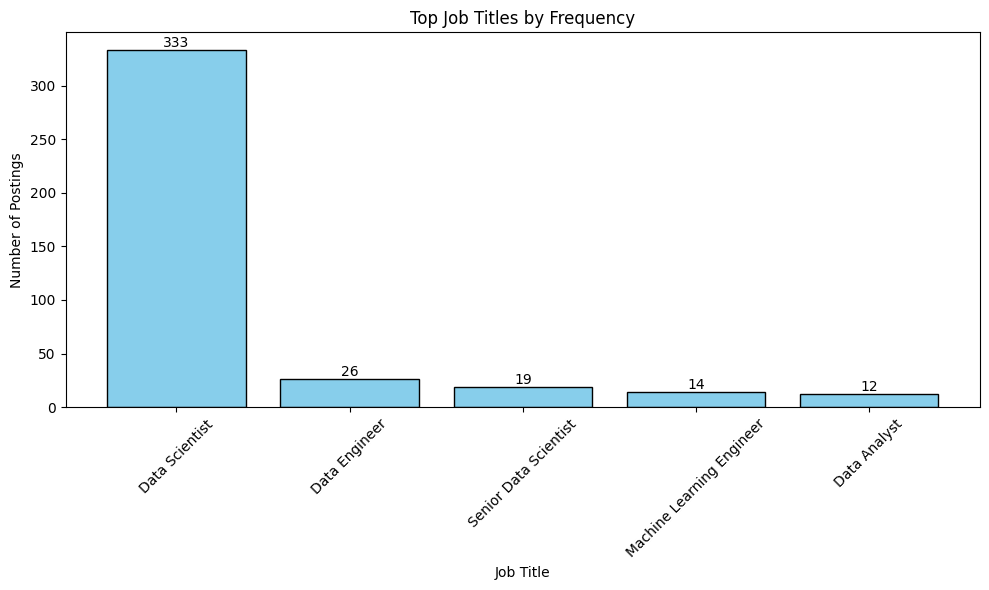

In [51]:
Top_jobs = jobs['Job Title'].value_counts().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
bars = plt.bar(Top_jobs.index, Top_jobs.values, color='skyblue', edgecolor='black')

plt.xlabel('Job Title')
plt.ylabel('Number of Postings')
plt.title('Top Job Titles by Frequency')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 , yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Distribution of Job Rating

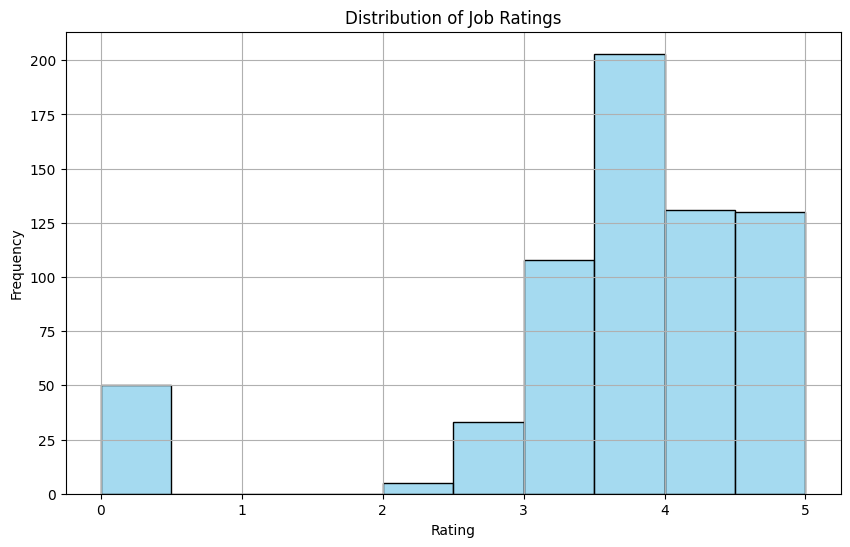

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(jobs['Rating'], color='skyblue', edgecolor='black', bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Job Ratings')
plt.grid(True)
plt.show()

###

### Headquarters

In [53]:
# Replace '-1' in the Headquarters column with state name from the Location column

head_1 = jobs.loc[jobs['Headquarters'] == '-1'].index
jobs.loc[head_1, 'Headquarters'] = jobs.loc[head_1, 'Location'].str.split(',').str[1].str.strip()

# Replace 'New York, 061' with 'New York, NY' in the 'Headquarters' column
jobs['Headquarters'] = jobs['Headquarters'].replace('New York, 061', 'New York, NY')

###

## Count Number of Headquarters by country 

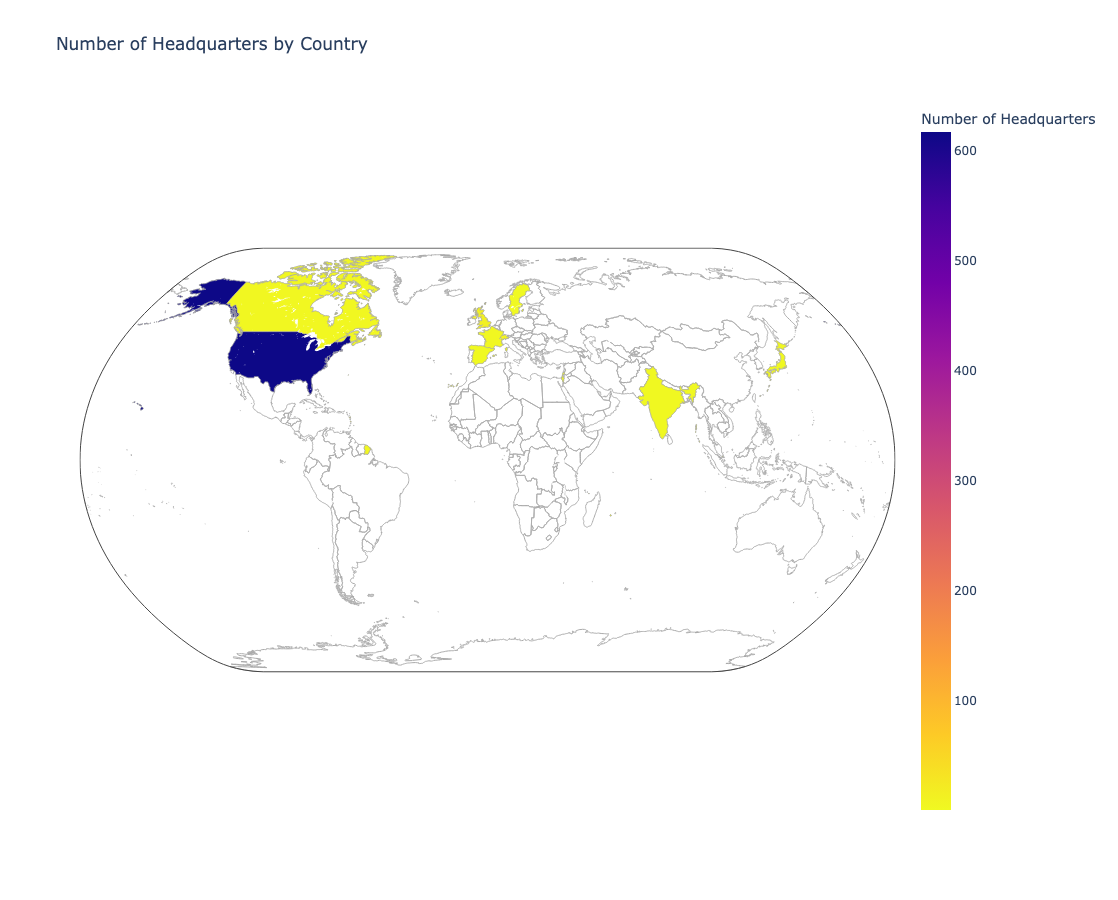

In [54]:
def determine_headquarters_country(location):
    parts = location.split(',')
    # If it's just a two-letter code, assume it's a state abbreviation
    if len(location.strip()) == 2:
        return 'USA'
    # If it has a comma and the second part is a two-letter code, it's a US location
    elif len(parts[-1].strip()) == 2:
        return 'USA'
    else:
        # Otherwise, assume it's a country name or non-standard format
        return parts[-1].strip()

# Apply the function to create a new column
jobs['Headquarters_country'] = jobs['Headquarters'].apply(determine_headquarters_country)

country_head_count = jobs['Headquarters_country'].value_counts().reset_index()
country_head_count.columns = ['Country', 'Count']



# Create the Choropleth map with enhanced interactivity
fig = go.Figure(data=go.Choropleth(
    locations=country_head_count['Country'],
    locationmode='country names',
    z=country_head_count['Count'],
    colorscale='Viridis',
    autocolorscale=True,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Number of Headquarters',
))

# Update the layout to enable zoom and hover features
fig.update_layout(
    title_text=   'Number of Headquarters by Country',
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection_type='natural earth',
        showland=True,
        landcolor="white",
        showcountries=True,  # Show country boundaries
        countrycolor="darkgray",  # Color of country boundaries
        resolution=50,  
    ),
    width=1200,  
    height=900,  
    dragmode='zoom' 
)

# Show the map
fig.show()


###

### Count number of headquarters in each state of USA

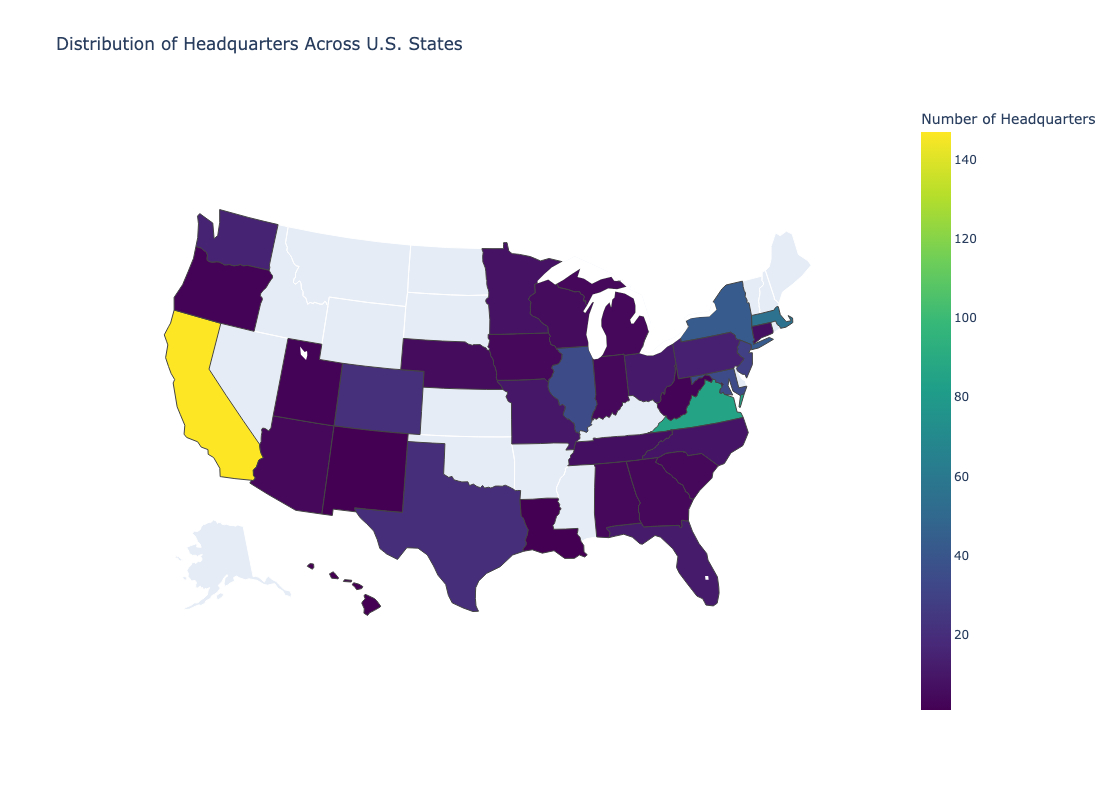

In [55]:
# If 2nd part of Headquarters len is 2 then its USA state.
us_states = jobs[jobs['Headquarters'].str.split(',').str[-1].str.strip().str.len() == 2] 


us_hq_count = us_states['Headquarters'].str.split(',').str[-1].str.strip()
us_state_count = us_hq_count.value_counts()

import plotly.graph_objs as go

# Plot U.S. states
fig = go.Figure()

fig.add_trace(go.Choropleth(
    locations=us_state_count.index,
    z= us_state_count.values.astype(float),
    locationmode='USA-states',
    colorscale='Viridis',
    colorbar_title="Number of Headquarters",
    showscale=True  
))


# Update the layout of the map
fig.update_layout(
    title_text=   'Distribution of Headquarters Across U.S. States',
    geo_scope='usa',  # Limit map scope to USA
    width = 1200,
    height = 800
)


fig.show()

###

###

### Distribution of Employee Sizes

In [56]:
jobs['Size'] = np.where(jobs['Size'] == '-1',  'Unknown', jobs['Size'])

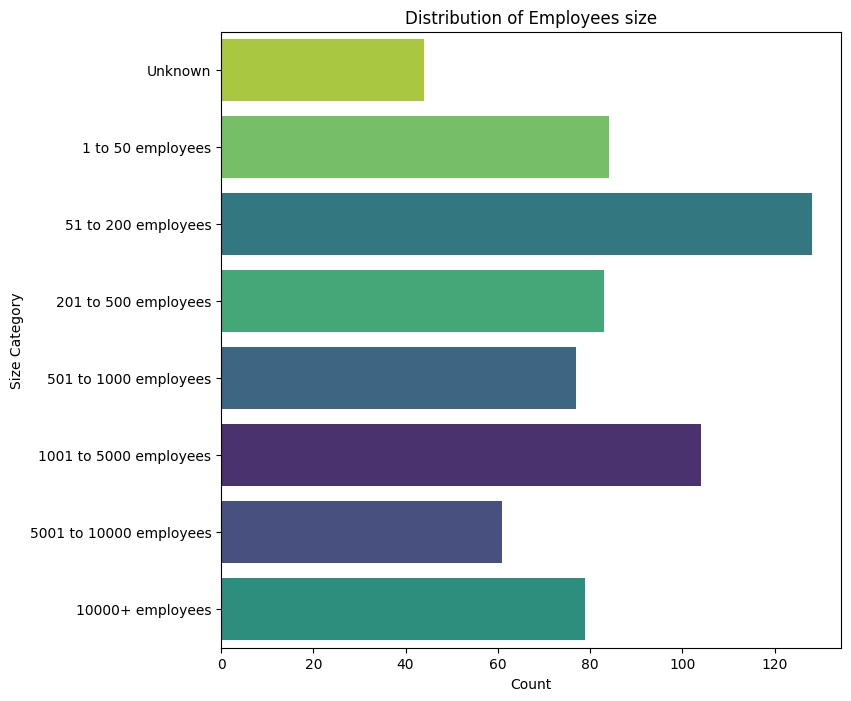

In [57]:
orders  = ['Unknown', '1 to 50 employees', '51 to 200 employees', '201 to 500 employees', '501 to 1000 employees', '1001 to 5000 employees',
         '5001 to 10000 employees', '10000+ employees']

plt.figure(figsize=(8, 8))
sns.countplot(y='Size', data=jobs, order=orders, hue='Size', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Size Category')
plt.title('Distribution of Employees size')
plt.show()

###

## Ownership Distribution

In [58]:
jobs['Type of ownership'] = np.where(jobs['Type of ownership'] == '-1', 'Unknown', jobs['Type of ownership'])

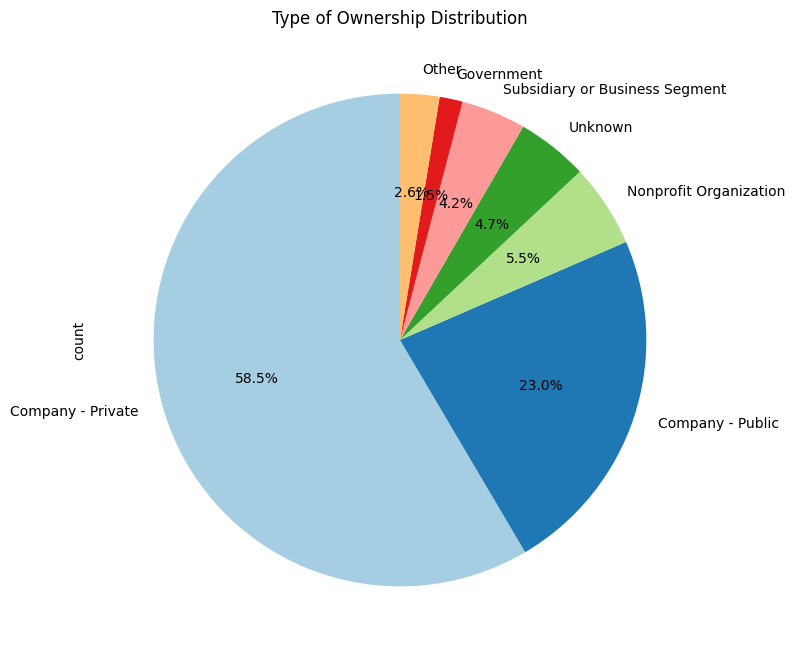

In [59]:

# Define a threshold for small categories
threshold = 10
sizes = jobs['Type of ownership'].value_counts()
sizes_grouped = sizes[sizes >= threshold]
sizes_grouped['Other'] = sizes[sizes < threshold].sum()

plt.figure(figsize=(10, 8))
sizes_grouped.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
plt.title('Type of Ownership Distribution')
plt.show()


###

###

## Top Industries 

In [60]:
jobs['Industry'] = np.where(jobs['Industry'] == '-1', 'Unknown', jobs['Industry'])

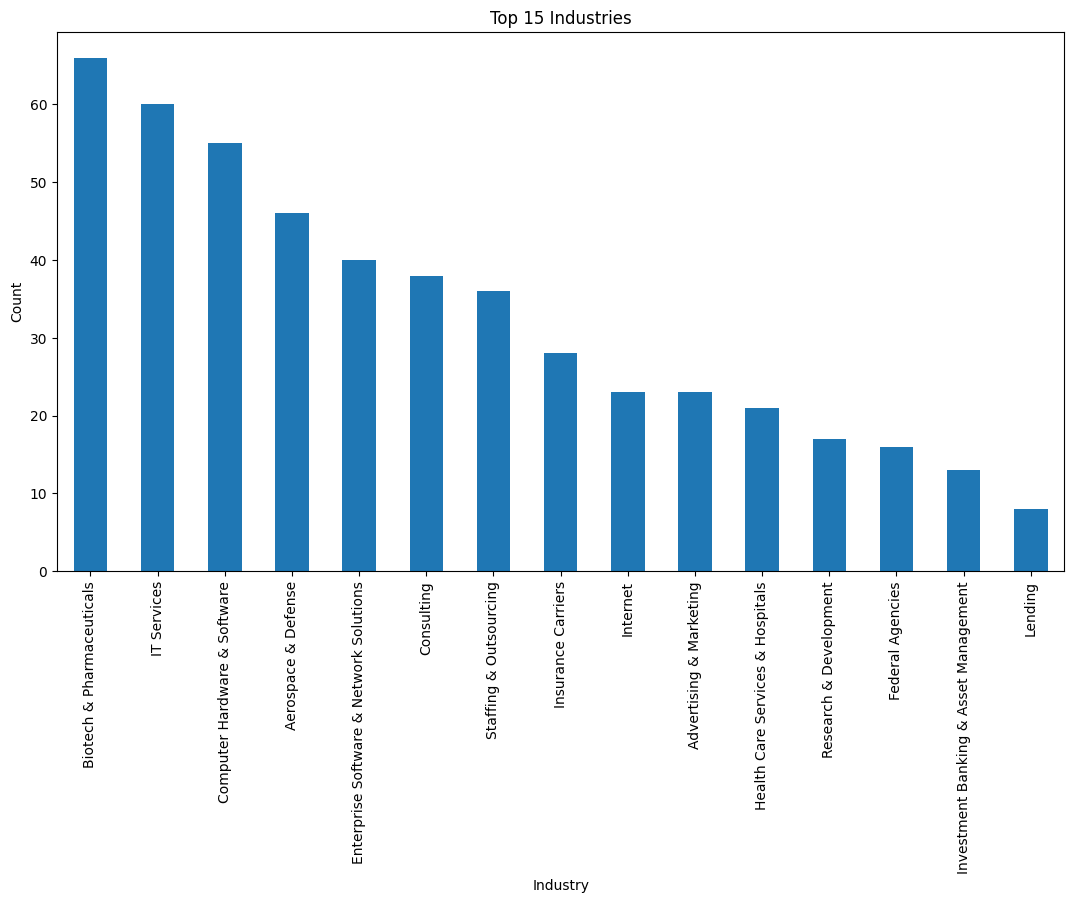

In [61]:
jobs_filtered = jobs[jobs['Industry'] != 'Unknown'] # Exclude Unknown

plt.figure(figsize=(13, 7))
jobs_filtered['Industry'].value_counts().head(15).plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Top 15 Industries')
plt.show()


###

### Distribution of Job simp 

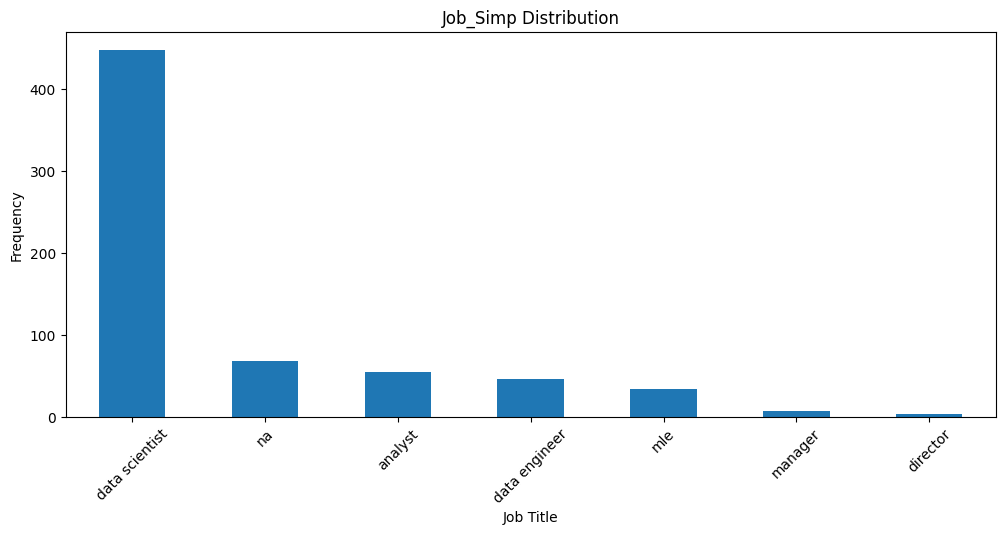

In [62]:
plt.figure(figsize=(12, 5))
jobs['job_simp'].value_counts().plot(kind='bar')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.title('Job_Simp Distribution')
plt.xticks(rotation=45)
plt.show()

###

### Top job title in each Industry

In [63]:
job_counts = jobs.groupby('Industry')['job_simp'].value_counts()

# Convert to DataFrame for easier manipulation
job_counts_df = job_counts.reset_index(name='Count')

# Find the top job_simp for each industry
top_jobs_by_industry = job_counts_df.sort_values(['Industry', 'Count'], ascending=[True, False])
top_jobs_by_industry = top_jobs_by_industry.groupby('Industry').head(1)  # Get top job for each industry

# Print results
print(top_jobs_by_industry)

                                     Industry        job_simp  Count
0                                  Accounting  data scientist      3
1                     Advertising & Marketing  data scientist     13
5                         Aerospace & Defense  data scientist     31
9        Architectural & Engineering Services  data scientist      3
10                      Banks & Credit Unions         analyst      3
13                  Biotech & Pharmaceuticals  data scientist     33
20      Cable, Internet & Telephone Providers  data scientist      1
21                     Chemical Manufacturing  data scientist      2
23                    Colleges & Universities             mle      2
25               Computer Hardware & Software  data scientist     33
31                               Construction  data scientist      2
32                                 Consulting  data scientist     31
37   Consumer Electronics & Appliances Stores  data scientist      2
38            Consumer Products Ma

###

###

## Skill Demand

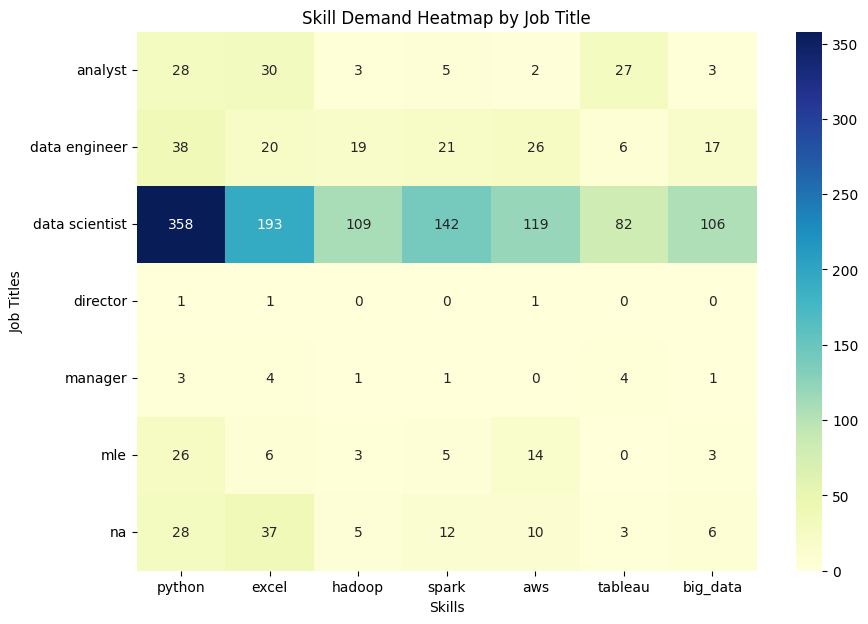

In [64]:
skills = ['python', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data']
skill_demand_by_job = jobs.groupby('job_simp')[skills].sum()

plt.figure(figsize=(10, 7))
ax = sns.heatmap(skill_demand_by_job, annot=True, fmt='d', cmap='YlGnBu', cbar=True)

# Set labels and title
plt.xlabel('Skills')
plt.ylabel('Job Titles')
plt.title('Skill Demand Heatmap by Job Title')

# Show the heatmap
plt.show()


###

### Best skill combinations

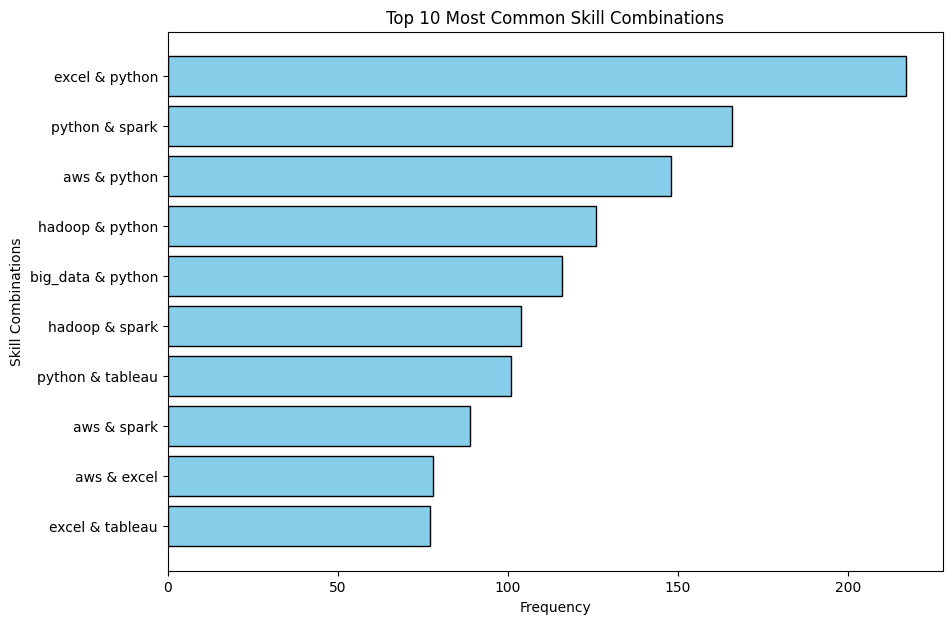

In [65]:
from itertools import combinations
from collections import Counter


skills = ['python', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data']

# Find common skill combinations
skill_combinations = []
for row in jobs[skills].itertuples(index=False):
    active_skills = [skill for skill, val in zip(skills, row) if val]
    skill_combinations.extend(combinations(sorted(active_skills), 2))

# Count and display common combinations
common_combinations = Counter(skill_combinations)
# Extract the 10 most common combinations and their counts
top_combinations = common_combinations.most_common(10)
combinations_list, counts = zip(*top_combinations)

# Convert tuple pairs into a readable format for labels
combinations_list = [' & '.join(pair) for pair in combinations_list]

# Plot the results
plt.figure(figsize=(10, 7))
plt.barh(combinations_list, counts, color='skyblue', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Skill Combinations')
plt.title('Top 10 Most Common Skill Combinations')
plt.gca().invert_yaxis()  # Invert y-axis to show the most common at the top
plt.show()


###

### Revenue

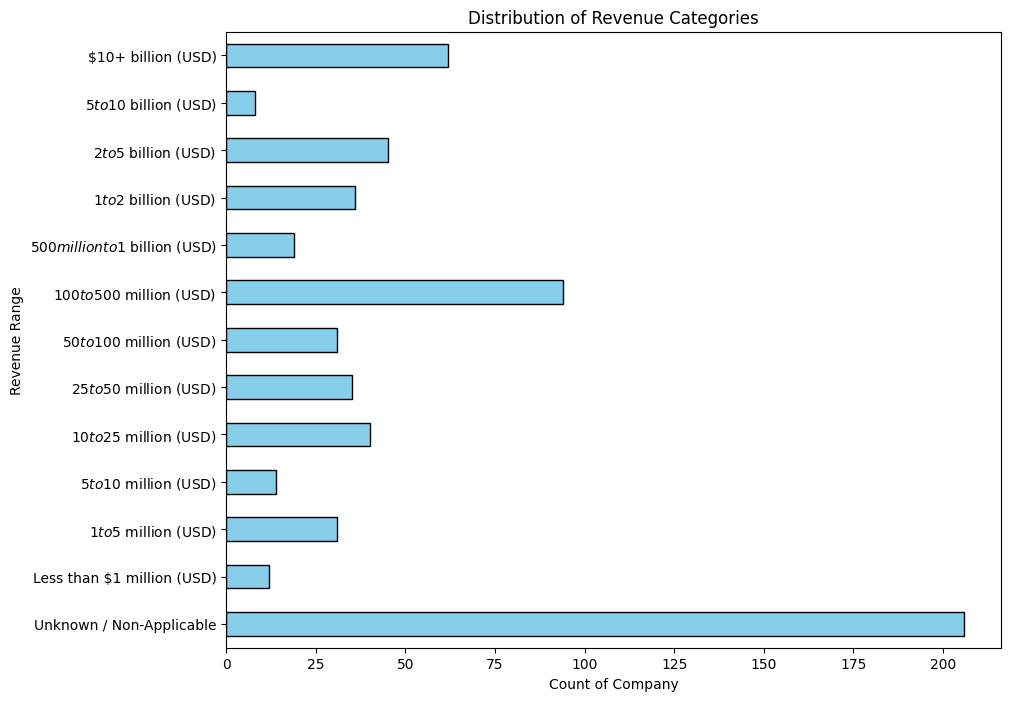

In [66]:
orders = ['Unknown / Non-Applicable', 'Less than $1 million (USD)', '$1 to $5 million (USD)','$5 to $10 million (USD)', 
         '$10 to $25 million (USD)', '$25 to $50 million (USD)','$50 to $100 million (USD)', 
         '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
        '$1 to $2 billion (USD)','$2 to $5 billion (USD)', '$5 to $10 billion (USD)', '$10+ billion (USD)' ]


jobs['Revenue'] = pd.Categorical(jobs['Revenue'], categories=orders, ordered=True)

# Plot the data
plt.figure(figsize=(10, 8))
jobs['Revenue'].value_counts().sort_index().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Count of Company')
plt.ylabel('Revenue Range')
plt.title('Distribution of Revenue Categories')
plt.show()

###

### Average salary distribution

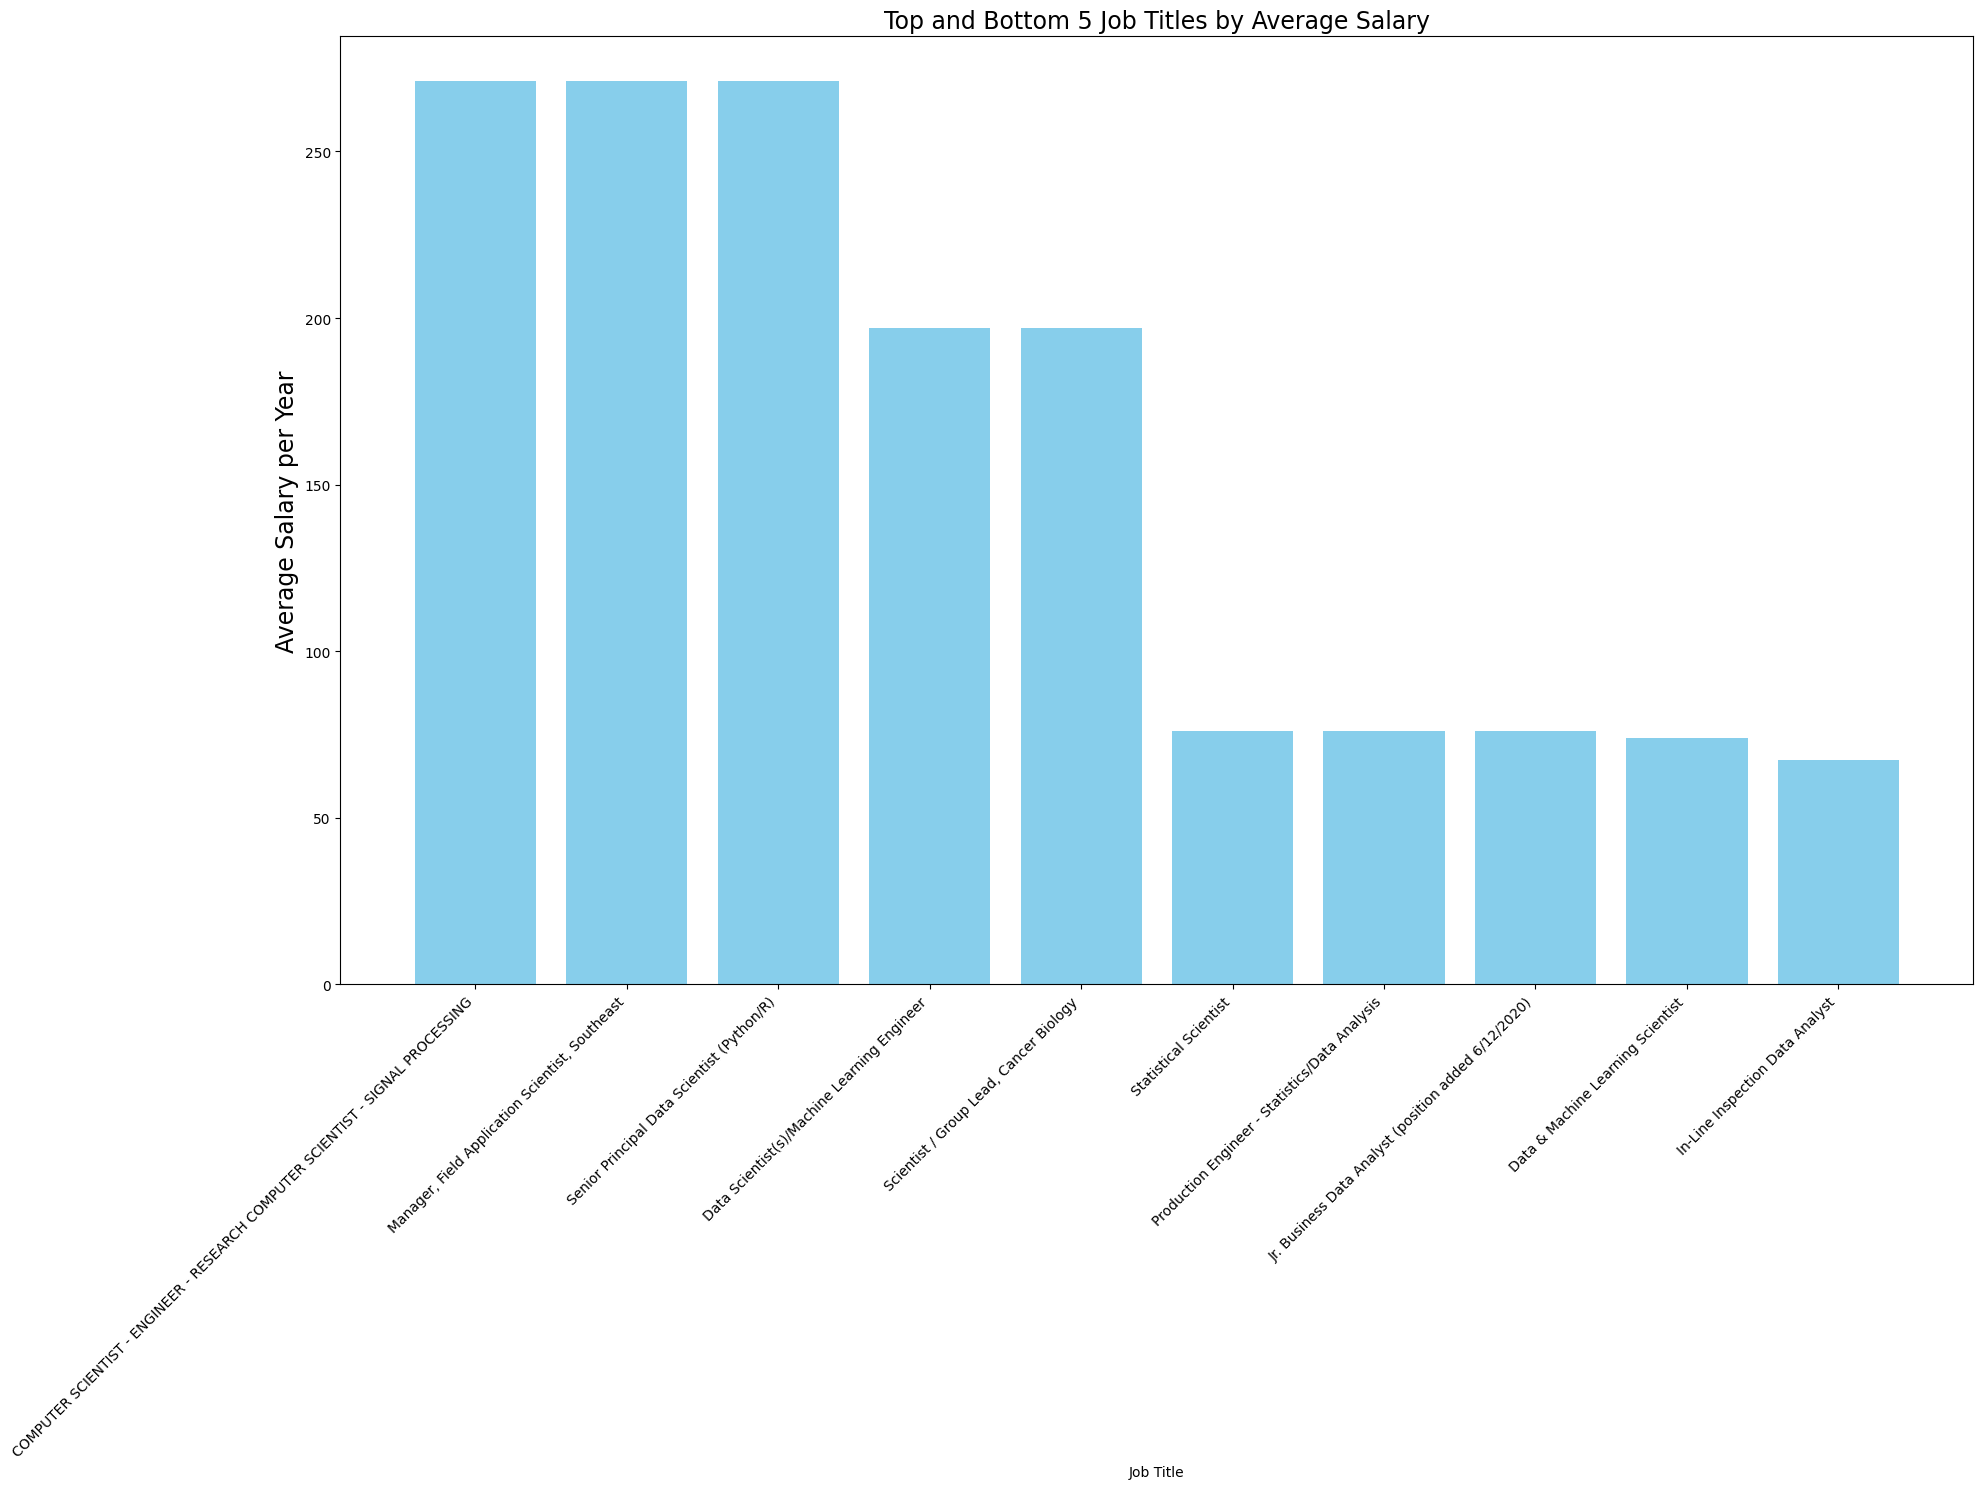

In [67]:
salary_dist = jobs.groupby('Job Title').agg({
    'avg_salary': 'mean'
})

# Combine the top 5 and bottom 5 into one dataset
salary_dist_combined = pd.concat([
    salary_dist.nlargest(5, 'avg_salary'),
    salary_dist.nsmallest(5, 'avg_salary').iloc[::-1]
])

# Create a bar plot with rotated x-labels
plt.figure(figsize=(20, 15))
plt.bar(salary_dist_combined.index, salary_dist_combined['avg_salary'], color='skyblue')
plt.xlabel('Job Title')
plt.ylabel('Average Salary per Year', fontsize=17)
plt.title('Top and Bottom 5 Job Titles by Average Salary', fontsize=17)
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()


###

###

### Company Age

In [68]:
# replace '-1 company_age with 'Unknown' 
jobs['company_age'] = np.where(jobs['company_age'] == '-1', 'Unknown', jobs['company_age'])

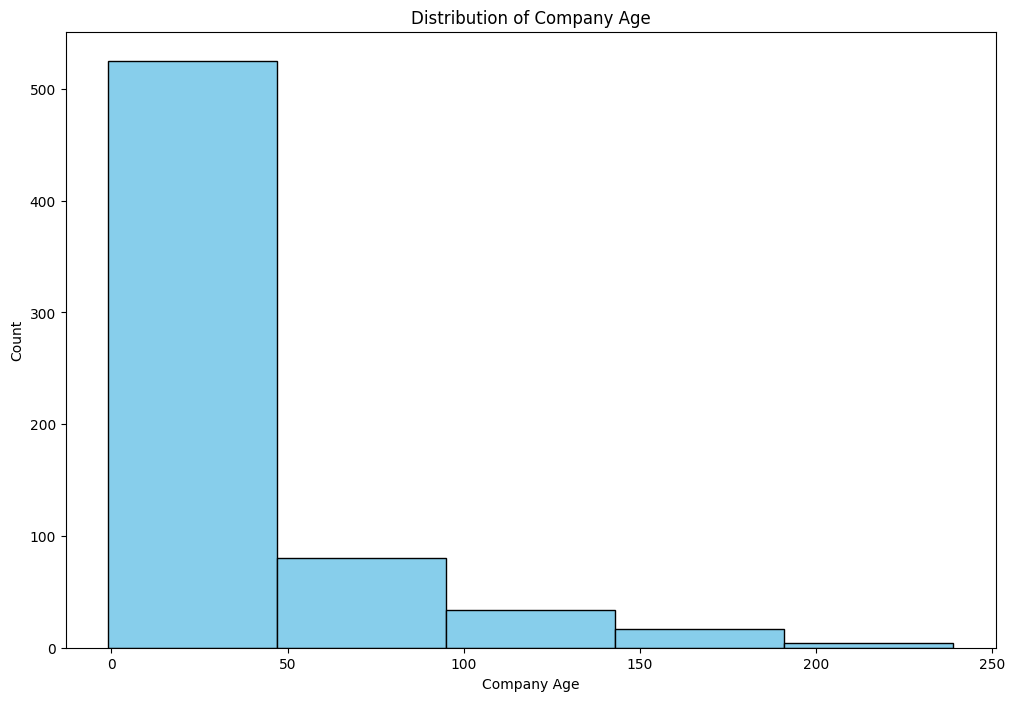

In [69]:
comp_age_values = jobs[jobs['company_age'] != 'Unknown']['company_age'].astype(int)

plt.figure(figsize=(12, 8))
plt.hist(comp_age_values, bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Company Age')
plt.ylabel('Count')
plt.title('Distribution of Company Age')
plt.show()

###

###

###